In [1]:
%matplotlib inline

In [2]:
from scipy import stats
import numpy as np

# 랜덤 넘버 생성

In [3]:
s = np.random.randint(0, 100, 10)
s

array([69, 97, 77, 72, 22, 33, 89, 88, 99, 48])

## 평균, 가중평균

In [4]:
print (np.average(s))
print (np.average(s, weights=range(1,11)))

69.4
68.8727272727


## 기하평균, 조화평균

In [5]:
print (stats.hmean(s))
print (stats.gmean(s))

55.2579471621
63.1121503716


## 종목 읽기

In [34]:
import pandas as pd

url_tmp = "http://real-chart.finance.yahoo.com/table.csv?" \
      "s=%s&a=0&b=1&c=2015&d=11&e=31&f=2015&g=d&ignore=.csv"

df_005930 = pd.read_csv(url_tmp % '005930.KS', index_col='Date', parse_dates={'Date'})
df_005930.head()

# Yahoo Finance, 거래량 0

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,1260000,1260000,1260000,1260000,0,1260000.00
2015-12-30,1260000,1272000,1254000,1260000,203900,1260000.00
2015-12-29,1265000,1266000,1241000,1254000,232900,1254000.00
2015-12-28,1285000,1289000,1266000,1266000,227200,1245999.99
2015-12-25,1285000,1285000,1285000,1285000,0,1264699.83


In [35]:
# Yahoo Finance, 거래량 0 제거

df_005930 = df_005930.ix[df_005930.Volume > 0]
df_005930.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-30,1260000,1272000,1254000,1260000,203900,1260000.00
2015-12-29,1265000,1266000,1241000,1254000,232900,1254000.00
2015-12-28,1285000,1289000,1266000,1266000,227200,1245999.99
2015-12-24,1295000,1300000,1285000,1285000,156100,1264699.83
2015-12-23,1292000,1299000,1282000,1295000,207100,1274541.86


In [44]:
len(df_005930) # 개장일 (개래량 > 0)

249

## KOSPI 지수 2015

In [48]:
df_ks11 = pd.read_csv(url_tmp % '^KS11', index_col='Date', parse_dates={'Date'})
df_ks11 = df_ks11.ix[df_ks11.Volume > 0]
df_ks11.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-30,1973.030029,1974.670044,1958.780029,1961.310059,304500,1961.310059
2015-12-29,1956.489990,1968.569946,1946.209961,1966.310059,401400,1966.310059
2015-12-28,1990.589966,1991.189941,1964.060059,1964.060059,396600,1964.060059
2015-12-24,2009.339966,2009.989990,1990.650024,1990.650024,504600,1990.650024
2015-12-23,1994.199951,2007.420044,1989.300049,1999.219971,502400,1999.219971


In [49]:
len(df_ks11)

248

# 기술 통계량 (요약 통계량)

In [50]:
df_ks11.describe()

,Open,High,Low,Close,Volume,Adj Close
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,2013.361249,2020.985361,2002.081292,2011.848749,455254.032258,2011.848749
std,69.687656,68.157473,69.269948,68.551742,138706.289989,68.551742
min,1840.939941,1864.300049,1800.750000,1829.810059,258800.000000,1829.810059
25%,1960.267456,1968.467468,1948.832519,1961.547455,366400.000000,1961.547455
50%,2014.674988,2023.440002,2002.845032,2013.114990,423300.000000,2013.114990
75%,2059.775086,2065.785034,2046.849945,2054.237427,509025.000000,2054.237427
max,2181.239990,2189.540039,2154.270020,2173.409912,1160800.000000,2173.409912


# 로그 수익률

In [55]:
df_005930['Ret'] = np.log(df_005930['Adj Close'] / df_005930['Adj Close'].shift(1))
df_005930.head()

,Open,High,Low,Close,Volume,Adj Close,Ret
Date,,,,,,,
2015-12-30,1260000,1272000,1254000,1260000,203900,1260000.00,NaN
2015-12-29,1265000,1266000,1241000,1254000,232900,1254000.00,-0.004773
2015-12-28,1285000,1289000,1266000,1266000,227200,1245999.99,-0.006400
2015-12-24,1295000,1300000,1285000,1285000,156100,1264699.83,0.014896
2015-12-23,1292000,1299000,1282000,1295000,207100,1274541.86,0.007752


# 로그 수익률 (지수)

In [56]:
df_ks11['Ret'] = np.log(df_ks11['Adj Close'] / df_ks11['Adj Close'].shift(1))
df_ks11.head()

,Open,High,Low,Close,Volume,Adj Close,Ret
Date,,,,,,,
2015-12-30,1973.030029,1974.670044,1958.780029,1961.310059,304500,1961.310059,NaN
2015-12-29,1956.489990,1968.569946,1946.209961,1966.310059,401400,1966.310059,0.002546
2015-12-28,1990.589966,1991.189941,1964.060059,1964.060059,396600,1964.060059,-0.001145
2015-12-24,2009.339966,2009.989990,1990.650024,1990.650024,504600,1990.650024,0.013447
2015-12-23,1994.199951,2007.420044,1989.300049,1999.219971,502400,1999.219971,0.004296


# 로그 수익률 차트

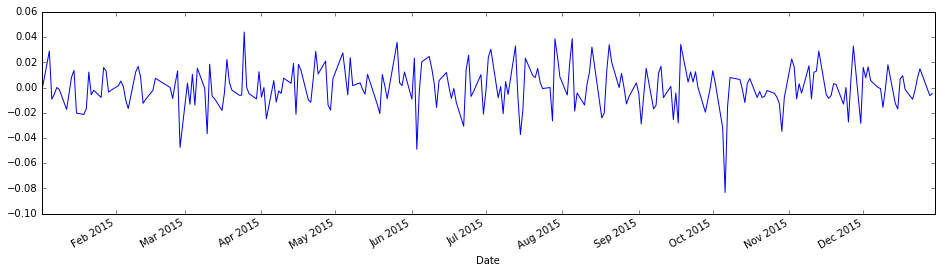

In [59]:
df_005930['Ret'].plot(figsize=(16,4))

# 로그 수익률 누적 차트

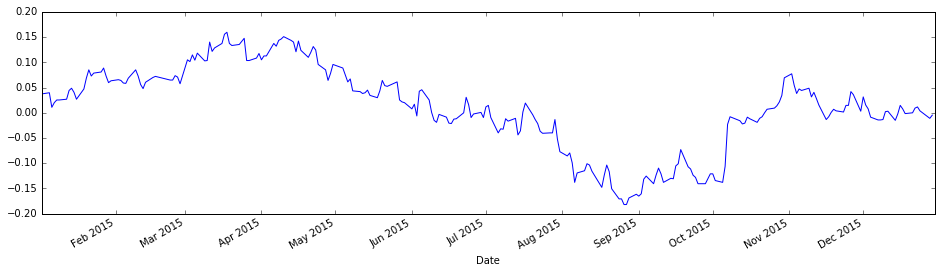

In [60]:
df_005930['Ret'].cumsum().plot(figsize=(16,4))

# 수정종가(Adj Close) 차트

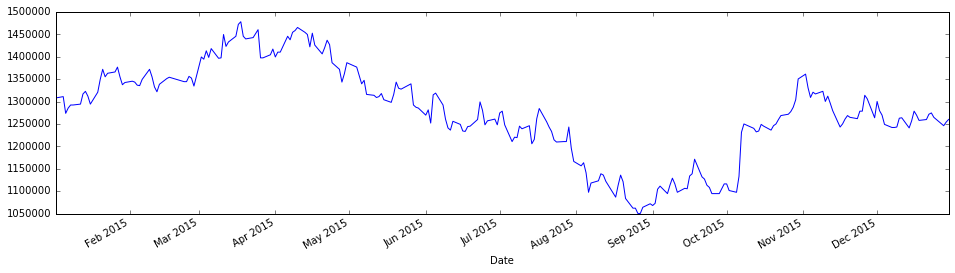

In [65]:
df_005930['Adj Close'].plot(figsize=(16,4))

# 수익률의 기술 통계량

In [69]:
df_005930['Ret'].describe()

count    248.000000
mean       0.000151
std        0.016526
min       -0.083312
25%       -0.008767
50%        0.000000
75%        0.010817
max        0.044054
Name: Ret, dtype: float64

In [70]:
def full_describe(df):
    print ('mean    %15.6f' % (df.mean()))
    print ('std_err %15.6f' % (df.std() / np.sqrt(df.count())))
    print ('median  %15.6f' % (df.median()))
    print ('std     %15.6f' % (df.std()))
    print ('var     %15.6f' % (df.var()))
    print ('kurt    %15.6f' % (df.kurt()))
    print ('skew    %15.6f' % (df.skew()))
    print ('range   %15.6f' % (df.max() - df.min()))
    print ('min     %15.6f' % (df.min()))
    print ('max     %15.6f' % (df.max()))
    print ('sum     %15.6f' % (df.sum()))
    print ('count   %15.6f' % (df.count()))

In [71]:
full_describe(df_005930['Ret'])

mean           0.000151
std_err        0.001049
median         0.000000
std            0.016526
var            0.000273
kurt           2.457841
skew          -0.486737
range          0.127366
min           -0.083312
max            0.044054
sum            0.037361
count        248.000000


In [72]:
full_describe(df_ks11['Ret'])

mean          -0.000073
std_err        0.000509
median        -0.000162
std            0.008003
var            0.000064
kurt           1.183365
skew           0.023153
range          0.054091
min           -0.029124
max            0.024967
sum           -0.017939
count        247.000000


# 2015 코스피 지수 히스토그램

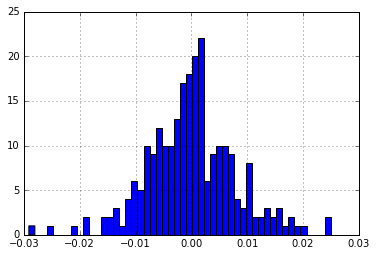

In [73]:
df_ks11['Ret'].hist(bins=50)

# 2015 삼성전자 수익률 히스토그램

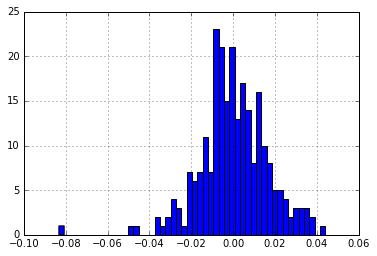

In [74]:
df_005930['Ret'].hist(bins=50)